# Happiness Prediction
- In this project, we will predict which countries or regions of the world will rise or fall in happiness based on factors such as GDP, freedom, and trust in government. We will use 
- How is this data collected? How is the happiness score calculated? 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d # for scatter plots
%matplotlib inline

## preprocessing
- read in from 2015-2019
- put them all in the same dataframe with a year as a label 

In [14]:
df2015 = pd.read_csv('world_happiness/2015.csv')
df2016 = pd.read_csv('world_happiness/2016.csv')
df2017 = pd.read_csv('world_happiness/2017.csv')
df2018 = pd.read_csv('world_happiness/2018.csv')
df2019 = pd.read_csv('world_happiness/2019.csv')

# print("2015 columns: ", df2015.columns)
# print("2016 columns: ", df2016.columns)
# print("2017 columns: ", df2017.columns)
# print("2018 columns: ", df2018.columns) # 2018, 2019 have the same column names
# print("2019 columns: ", df2019.columns)

### preprocessing notes
- country / region in 2015 and 2016 can be joined. 2017 has just country 
- 2015/2016 have similar formats
- <b>should check out 2020 report</b>

### box plot of the countries vs. happiness rating

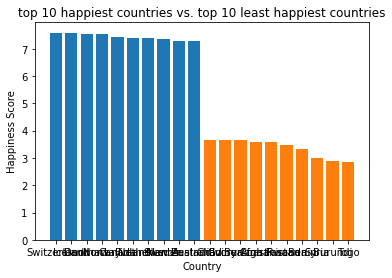

In [29]:
plt.bar(df2015['Country'].iloc[:10], df2015['Happiness Score'].iloc[:10])
plt.bar(df2015['Country'].iloc[-10:], df2015['Happiness Score'].iloc[-10:])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('top 10 happiest countries vs. top 10 least happiest countries for 2015')
plt.show()

### view of the top 10 countries in 2019

In [33]:
df2019 = pd.read_csv('world_happiness/2019.csv')
df2019.iloc[:10,]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


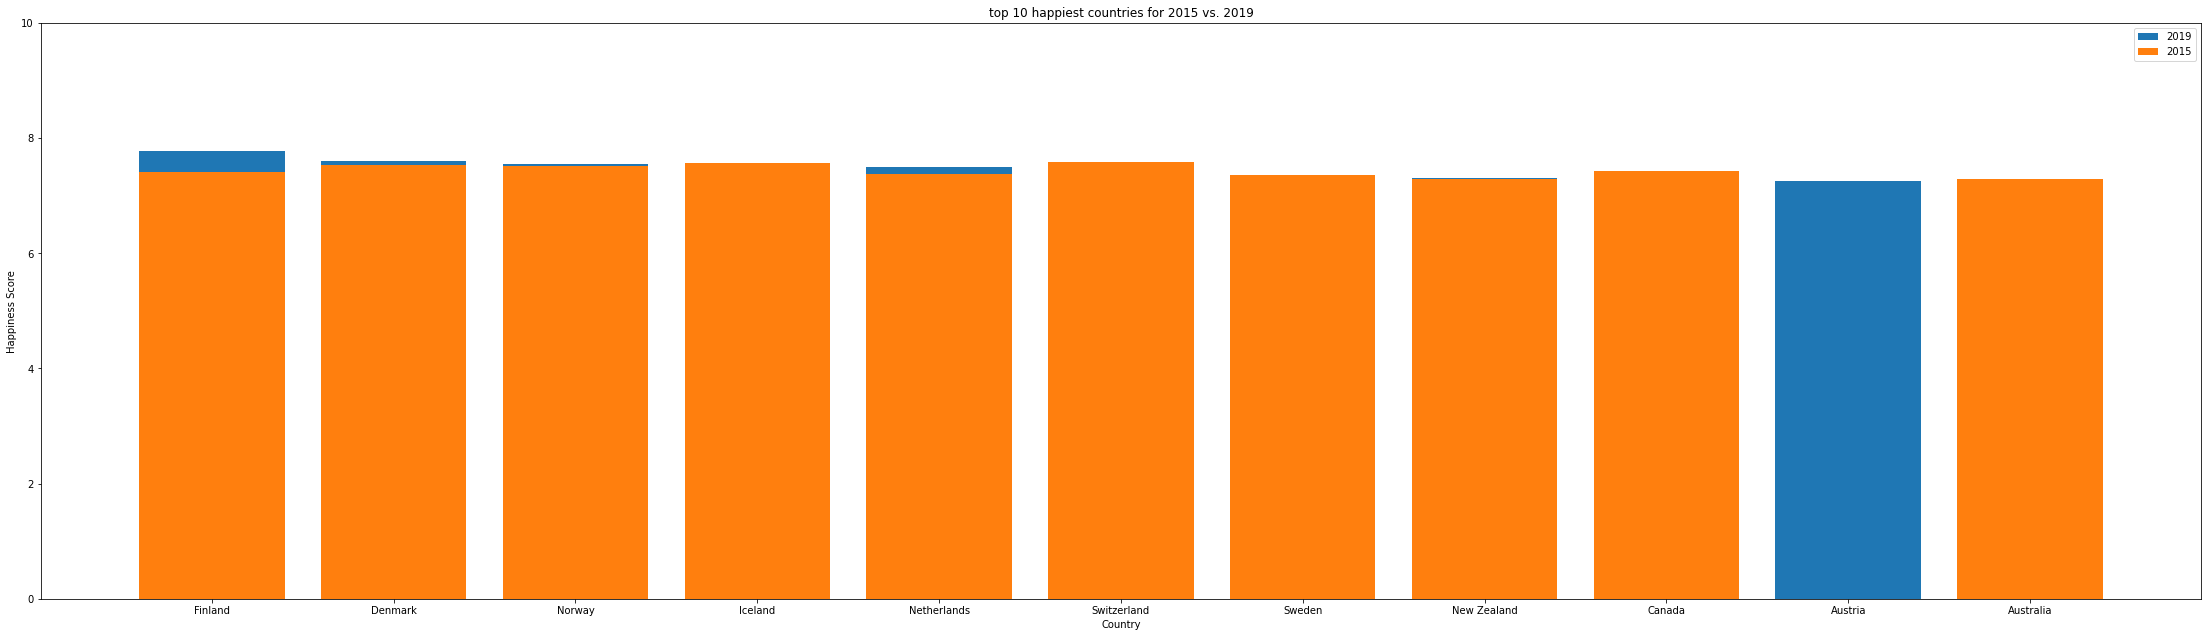

In [52]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 5, 2]) 

plt.bar(df2019['Country or region'].iloc[:10], df2019['Score'].iloc[:10], label='2019')
plt.bar(df2015['Country'].iloc[:10], df2015['Happiness Score'].iloc[:10], label='2015')
# plt.bar(df2019['Country or region'].iloc[-10:], df2019['Score'].iloc[-10:])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.ylim(0, 10)
plt.title('top 10 happiest countries for 2015 vs. 2019')
plt.legend()
plt.show()